## Logistic Regression

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py

### Binary Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
# from sklearn.metrics import balanced_accuracy_score

%matplotlib inline

Confusion Matrix
[[88 12]
 [ 9 91]]
88 12 9 91

Classification Report
             precision    recall  f1-score   support

          0       0.91      0.88      0.89       100
          1       0.88      0.91      0.90       100

avg / total       0.90      0.90      0.89       200


Accuracy Score
0.895


F1 Score
[ 0.89340102  0.89655172]


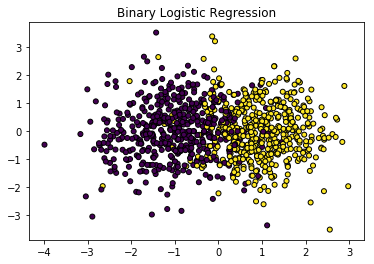

In [2]:
n = 1000
# n_classes = 2 by default
features, binary_class = make_classification(n_samples=n, n_features=2,  
#                                              weights=[.4, .6], # weights per class
                                             n_informative=1, n_redundant=0, n_clusters_per_class=1)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2']
df['Binary_Class'] = binary_class

X = df.drop('Binary_Class', axis=1)
y = df['Binary_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print(tn, fp, fn, tp)

print()
print('Classification Report')
print(classification_report(y_test,predictions))

print()
print('Accuracy Score')
print(accuracy_score(y_test, predictions))

print()
# print('Balanced Accuracy Score')
# print(balanced_accuracy_score(y_test, predictions))

print()
print('F1 Score')
print(f1_score(y_test, predictions, average=None))

plt.figure()
plt.title("Binary Logistic Regression")
plt.scatter(df['Feature_1'], df['Feature_2'], marker='o', c=df['Binary_Class'], s=25, edgecolor='k')
plt.show()

### Multiclass Logistic Regression

Confusion Matrix
[[76  2  1]
 [ 1 54  5]
 [ 0  4 57]]

Classification Report
             precision    recall  f1-score   support

          0       0.99      0.96      0.97        79
          1       0.90      0.90      0.90        60
          2       0.90      0.93      0.92        61

avg / total       0.94      0.94      0.94       200


Accuracy Score
0.935


F1 Score
[ 0.97435897  0.9         0.91935484]


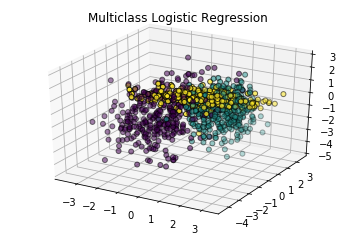

Text(0.5,1,'Multiclass Logistic Regression Pair Plot')

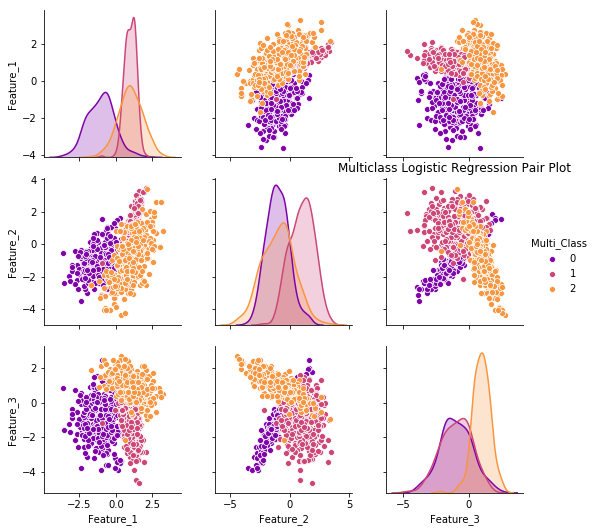

In [3]:
n = 1000
# https://chrisalbon.com/machine_learning/basics/make_simulated_data_for_classification/
# Create a simulated feature matrix and output vector with 100 samples
features, multi_class = make_classification(n_samples = n, n_features = 3,
                                       n_informative = 3, # features that actually predict the output's classes
                                       n_redundant = 0, # features that are random and unrelated to the output's classes
#                                        weights = [.2, .3, .5],
                                       n_classes = 3, n_clusters_per_class=1)

# Create a dataframe of the features and add the binary class (label, output)
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2', 'Feature_3']
df['Multi_Class'] = multi_class

X = df.drop('Multi_Class', axis=1)
y = df['Multi_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
# tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
# print(tn, fp, fn, tp)

print()
print('Classification Report')
print(classification_report(y_test,predictions))

print()
print('Accuracy Score')
print(accuracy_score(y_test, predictions))

print()
# print('Balanced Accuracy Score')
# print(balanced_accuracy_score(y_test, predictions))

print()
print('F1 Score')
print(f1_score(y_test, predictions, average=None))

plt.figure()
ax = plt.axes(title='Multiclass Logistic Regression', projection='3d')
ax.scatter(df['Feature_1'], df['Feature_2'], df['Feature_3'], marker='o', c=df['Multi_Class'], s=25, edgecolor='k')
plt.show()

# np.seterr(divide='ignore', invalid='ignore')
g = sns.pairplot(df, hue='Multi_Class', vars=(['Feature_1', 'Feature_2', 'Feature_3']), palette='plasma')
ax = plt.gca()
ax.set_title("Multiclass Logistic Regression Pair Plot")